In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from VLC_init import *


"""
*: coordinate center of cari

|--------|                     
| car1   |                      
|-------*|
         |
       y |                   |---------|
         |                   |  car2   |
         |-------------------|*--------|
                    d

"""

vlc_obj = VLC_init()
dt = 5e-9
t = np.arange(0, 1e-4, dt)
noise = np.random.normal(0, 1e-1, np.size(t))
c = 299792458
delay = 2e-6
f = 1e5
r = 9
N = 5
fclk   = 1/(2*dt)

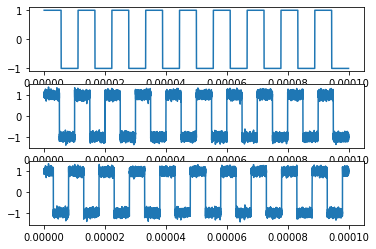

In [ ]:
s_e = signal.square(2 * np.pi * f * t) + noise
s_r = signal.square(2 * np.pi * f * (t + delay)) + noise
s_h = signal.square(2 * np.pi * f * (r/(r+1)) * t)

s_gate = (signal.square(2 * np.pi * (f / (N * (r+1))) *t) > 0)
s_clk  = np.zeros(np.size(t))
s_clk[np.arange(1, np.size(s_clk), 2)] = 1

s_eh = np.zeros(np.size(t))
s_rh = np.zeros(np.size(t))
s_phi = np.zeros(np.size(t))
s_phi_h = np.zeros(np.size(t))
s_phi_hh = np.zeros(np.size(t))

s_eh_state = 0
s_rh_state = 0

count = []
M = 0

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, s_h)
plt.subplot(3, 1, 2)
plt.plot(t, s_e)
plt.subplot(3, 1, 3)
plt.plot(t, s_r)

In [3]:
for i in range(1, np.size(t)):
    
    if(s_h[i] - s_h[i-1] == 2):
        
        if(s_e[i] > 0):
            s_eh_state = 1
        else:
            s_eh_state = 0

        if(s_r[i]>0):
            s_rh_state = 1
        else:
            s_rh_state = 0
            
    s_eh[i] = s_eh_state
    s_rh[i] = s_rh_state
    
    s_phi[i] = np.logical_xor(s_eh_state, s_rh_state)
    
    s_phi_h[i] = s_phi[i] * s_gate[i]
    s_phi_hh[i] = s_phi_h[i] * s_clk[i]
    
    if(s_gate[i] == 1):
        if(s_phi_hh[i] == 1):
            M += 1
        update_flag = 1
    else:
        if(update_flag == 1):
            count.append(M)
            M = 0
            update_flag = 0

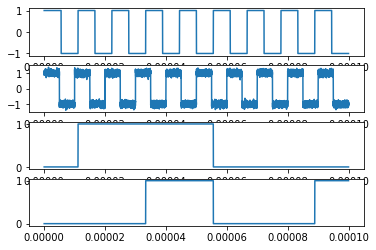

In [4]:
plt.figure()
plt.subplot(4, 1, 1)
plt.plot(t, s_h)
plt.subplot(4, 1, 2)
plt.plot(t, s_e)
plt.subplot(4, 1, 3)
plt.plot(t, s_eh)
plt.subplot(4, 1, 4)
plt.plot(t, s_phi)

In [7]:
d_m = (c/2) * (np.asarray(count) / ((r+1) * N * fclk))

In [8]:
d_m

array([], dtype=float64)